# Jaccard Index Analysis and Summary Stats

Author: Audrey Yip (with help from Eni Mustafaraj)

Date: Feb 19 2024

**Table of Contents**

1. [Importing Data](#sec1)
2. [Exploratory Analysis](#sec2)
3. [Jaccard Analysis](#sec3)
4. [Visualizations](#sec4)
5. [Saved Video Analysis](#sec5)

In [2]:
import os, csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="sec1"></a>
### 1. Importing Data

In [3]:
files = os.listdir('data') # function lists the content of a directory
files = sorted(files)

onlyAllData = [f for f in files if 'all' in f]

savedData = [f for f in files if ('saved' in f)]

In [4]:
# create 3 dfs: control data, save data, all data

control_dfs = []
save_dfs = []
all_dfs = []

# control and save data
for fN in onlyAllData: # folder with files that have all posts
    path = os.path.join('data', fN) # create file path
    df = pd.read_csv(path) # create dataframe

    # add column to indicate date/time collected
    df['collectionTime'] = fN[:11]

    if 'AY' in fN:
        df['pair'] = 'line1'
    elif 'JK' in fN:
        df['pair'] = 'pair_3'
    elif 'JR' in fN:
        df['pair'] = 'pair_4'
    elif 'MG' in fN:
        df['pair'] = 'pair_5'
    else:
        df['pair'] = 'pair_2'

    if 'control' in fN:
        df['testType'] = 'control'
        control_dfs.append(df)
    else:
        df['testType'] = 'experiment'
        save_dfs.append(df)

    all_dfs.append(df)


In [5]:
# Data for all saved videos
saved_vids_dfs = []

for fN in savedData: # folder with files that have all saved posts
    path = os.path.join('data', fN) # create file path
    df = pd.read_csv(path) # create dataframe

    # add column to indicate date/time collected
    df['collectionTime'] = fN[:11]

    # add column with unique post id
    #df['postID'] = df.apply(createPostID, axis=1) # use axis=1 to process one row at a time

    if 'AY' in fN:
        df['pair'] = 'pair_1'
    elif 'JK' in fN:
        df['pair'] = 'pair_3'
    elif 'JR' in fN:
        df['pair'] = 'pair_4'
    elif 'MG' in fN:
        df['pair'] = 'pair_5'
    else:
        df['pair'] = 'pair_2'

    saved_vids_dfs.append(df)

In [6]:
# concatenate dataframes

df_control = pd.concat(control_dfs, ignore_index=True)
df_save = pd.concat(save_dfs, ignore_index=True)
df_all = pd.concat(all_dfs, ignore_index=True)
df_saved_videos = pd.concat(saved_vids_dfs, ignore_index=True)


In [7]:
# change time stamps to match control and save pairs

collection_times = {}

for i in range(0, len(onlyAllData) - 1, 2):
    time_1 = onlyAllData[i][:11]
    time_2 =  onlyAllData[i+1][:11]
    collection_times[time_1] = time_2


for df in [df_control, df_save, df_all, df_saved_videos]:
    df['collectionTime'].replace(collection_times, inplace=True)

/var/folders/94/hzlwrw5d571cgm5snsf618b00000gn/T/ipykernel_3000/441226226.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['collectionTime'].replace(collection_times, inplace=True)


In [8]:
# check to make sure it worked
df_all['collectionTime'].unique()

array(['02-14-16-57', '02-14-17-05', '02-14-19-04', '02-14-20-34',
       '02-14-22-46', '02-15-09-13', '02-15-11-18', '02-15-13-57',
       '02-15-17-26', '02-15-19-11', '02-15-20-04', '02-15-21-22',
       '02-17-13-50', '02-17-14-15', '02-17-15-00', '02-17-15-32',
       '02-17-16-02', '02-17-17-20', '02-17-17-31', '02-17-17-55',
       '02-17-18-03', '02-17-20-15', '02-17-20-44', '02-17-21-37',
       '02-17-22-10', '02-18-21-12', '02-18-21-38', '02-19-07-18',
       '02-19-08-01', '02-19-08-46', '02-19-09-27', '02-19-10-15',
       '02-19-13-50', '02-19-16-17', '02-19-16-37'], dtype=object)

<a id="sec2"></a>
### 2. Exploratory Analysis

In [9]:
# summary statistics
print("Total number of control videos:", df_control.shape[0])
print("Total number of experiment videos:", df_save.shape[0])
print("Total number of saved videos:", df_saved_videos.shape[0]) 
print("Total number of videos:", df_all.shape[0])   # sanity check, should add up


Total number of control videos: 15761
Total number of experiment videos: 14840
Total number of saved videos: 7672
Total number of videos: 30601


In [10]:
# find counts and percentages of saved videos
saved_summary = []

for pair_id in ['pair_1', 'pair_2', 'pair_3', 'pair_4', 'pair_5']: 
    ## filter rows for the current pair and count for experimental scenarios

    pair_df_save = df_save[df_save['pair'] == pair_id]
    pair_df_saved_videos = df_saved_videos[df_saved_videos['pair'] == pair_id]

    exp_num = len(pair_df_save)
    saved_num = len(pair_df_saved_videos)

    pair_summary = {
        'pair_id': pair_id,
        'experiment_video_count': exp_num,
        'saved_videos_count': saved_num,
        'percent_ saved': saved_num / exp_num * 100
    }

    saved_summary.append(pair_summary)
    

df_saved_summary = pd.DataFrame(saved_summary)
df_saved_summary

ZeroDivisionError: division by zero

In [11]:
# check for nan values
nan_counts_by_column = df_all.isna().sum()

print("Number of NaN Values by Column \n (Across All Data)")
print(nan_counts_by_column)

Number of NaN Values by Column 
 (Across All Data)
batch                0
index                0
music                0
hashtag           7544
author               0
likes                0
comments             0
shares               0
saves                0
collectionTime       0
pair                 0
testType             0
dtype: int64


In [12]:
hashtag_summary = []

for pair_id in ['pair_1', 'pair_2', 'pair_3', 'pair_4', 'pair_5']: 
    # filter rows for the current pair
    pair_df = df_all[df_all['pair'] == pair_id]
    control_pair_df = pair_df[pair_df['testType'] == 'control']
    exp_pair_df = pair_df[pair_df['testType'] == 'experiment']

    # calculate counts of videos without music for control, experiment, and total
    no_hashtag_control = control_pair_df['hashtag'].isna().sum()
    no_hashtag_exp = exp_pair_df['hashtag'].isna().sum()
    no_hashtag_total = pair_df['hashtag'].isna().sum()
    
    total_control = len(control_pair_df)
    total_exp = len(exp_pair_df)
    total = len(pair_df)

    # calculate percentages of videos without hashtags
    pct_no_hashtag_control = (no_hashtag_control / total_control) * 100
    pct_no_hashtag_exp = (no_hashtag_exp / total_exp) * 100
    pct_no_hashtag_total = (no_hashtag_total / total) * 100

    pair_summary = {
        'pair_id': pair_id,
        'count_no_hashtags_control': no_hashtag_control,
        'percent_no_hashtags_control': pct_no_hashtag_control,
        'count_no_hashtags_exp': no_hashtag_exp,
        'percent_no_hashtags_exp': pct_no_hashtag_exp,
        'count_no_hashtags_total': no_hashtag_total,
        'percent_no_hashtags_total': pct_no_hashtag_total
    }

    hashtag_summary.append(pair_summary)

df_hashtag_summary = pd.DataFrame(hashtag_summary)
df_hashtag_summary


/var/folders/94/hzlwrw5d571cgm5snsf618b00000gn/T/ipykernel_3000/958634525.py:19: RuntimeWarning: invalid value encountered in scalar divide
  pct_no_hashtag_control = (no_hashtag_control / total_control) * 100
/var/folders/94/hzlwrw5d571cgm5snsf618b00000gn/T/ipykernel_3000/958634525.py:20: RuntimeWarning: invalid value encountered in scalar divide
  pct_no_hashtag_exp = (no_hashtag_exp / total_exp) * 100
/var/folders/94/hzlwrw5d571cgm5snsf618b00000gn/T/ipykernel_3000/958634525.py:21: RuntimeWarning: invalid value encountered in scalar divide
  pct_no_hashtag_total = (no_hashtag_total / total) * 100


,pair_id,count_no_hashtags_control,percent_no_hashtags_control,count_no_hashtags_exp,percent_no_hashtags_exp,count_no_hashtags_total,percent_no_hashtags_total
0,pair_1,0,NaN,0,NaN,0,NaN
1,pair_2,903,24.705882,760,21.895707,1663,23.337075
2,pair_3,454,22.700000,1003,28.261482,1457,26.256983
3,pair_4,862,27.743804,709,22.401264,1571,25.047832
4,pair_5,961,25.660881,505,21.138552,1466,23.899576


In [13]:
pair_1_df = df_all[df_all['pair'] == 'pair_1']
print(pair_1_df.shape)

pair_2_df = df_all[df_all['pair'] == 'pair_2']
print(pair_2_df.shape)


batch_size_stats = pair_1_df.groupby(["batch", "collectionTime", "testType"]).size().describe()
print("\nSummary Statistics for Batch Size \n (Across All Data)")
print(batch_size_stats)

nan_counts_by_column = pair_1_df.isna().sum()

print("Number of NaN Values by Column \n (Pair_1)")
print(nan_counts_by_column)

(0, 12)
(7126, 12)

Summary Statistics for Batch Size 
 (Across All Data)
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
dtype: float64
Number of NaN Values by Column 
 (Pair_1)
batch             0
index             0
music             0
hashtag           0
author            0
likes             0
comments          0
shares            0
saves             0
collectionTime    0
pair              0
testType          0
dtype: int64


In [14]:
import matplotlib.pyplot as plt

def plot_batch_sizes(pair_id, df):
    """ Takes pair_id, and df name to show batch sizes"""

    pair_df = df[df['pair'] == pair_id]
    control_df = pair_df[pair_df['testType'] == 'control']
    experiment_df = pair_df[pair_df['testType'] == 'experiment']

    # group batch sizes for experiment and control test types
    batch_sizes_experiment = experiment_df.groupby(["collectionTime", "batch"]).size()
    batch_sizes_control = control_df.groupby(["collectionTime", "batch"]).size()

    # align indices to ensure they have the same index
    all_indices = sorted(set(batch_sizes_experiment.index).union(set(batch_sizes_control.index)))
    batch_sizes_experiment = batch_sizes_experiment.reindex(all_indices, fill_value=0)
    batch_sizes_control = batch_sizes_control.reindex(all_indices, fill_value=0)

    # plotting
    plt.figure(figsize=(12, 6))  # Set the figure size
    bar_width = 0.35
    r1 = range(len(batch_sizes_experiment))
    r2 = [x + bar_width for x in r1]

    # plot bars for experiment and control groups
    plt.bar(r1, batch_sizes_experiment, color='steelblue', width=bar_width, label='Experiment')
    plt.bar(r2, batch_sizes_control, color='salmon', width=bar_width, label='Control')

    # set labels and title
    plt.xlabel('Batch', fontsize=12)
    plt.ylabel('Size', fontsize=12)
    plt.title(f'Batch Sizes for {pair_id}', fontsize=14)
    
    # set x-axis ticks and rotate labels
    tick_positions = [(r1[i] + r2[i]) / 2 for i in range(len(r1))]
    plt.xticks(tick_positions, [f"{time}, {batch}" for time, batch in batch_sizes_experiment.index], rotation=45, fontsize=8, ha='right')
    
    plt.legend()
    plt.show()

# Example usage
# plot_batch_s


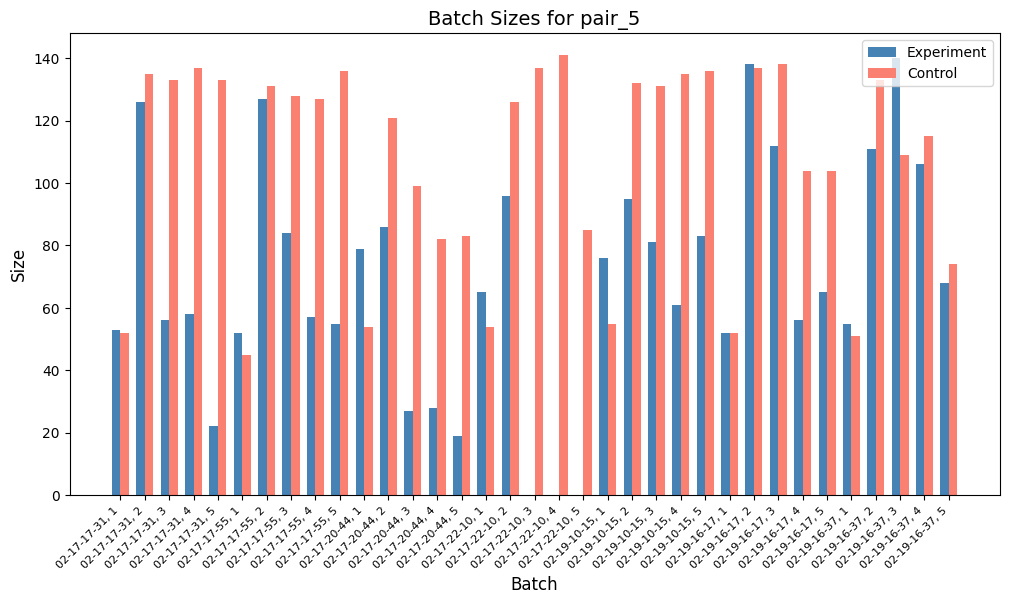

In [15]:
# use to get graphs
plot_batch_sizes('pair_5', df_all)  

In [16]:
batch_size_stats = df_all.groupby(["batch", "collectionTime", "testType"]).size().describe()
print("\nSummary Statistics for Batch Size \n (Across All Data)")
print(batch_size_stats)


Summary Statistics for Batch Size 
 (Across All Data)
count    339.000000
mean      90.268437
std       35.934053
min        8.000000
25%       56.000000
50%       91.000000
75%      123.000000
max      147.000000
dtype: float64


<a id="sec3"></a>
### 3. Jaccard Analysis 

In [17]:
## define function for calculating jaccard index

def jaccard_index(list_1, list_2):
    set_1 = set(list_1)
    set_2 = set(list_2)
    intersection = len(set_1.intersection(set_2))
    union = len(set_1.union(set_2))
    return intersection / union if union != 0 else 0

In [18]:
# create new df with difference of feeds for each collectionTime
jaccard_list_1 = []
jaccard_list_2 = []
jaccard_list_3 = []

collection_times = df_all['collectionTime'].unique()

variables = ['hashtag', 'author', 'music']

for coll_time in collection_times:
    jaccard_dict = {}
    for variable in variables:
        sub_df_control = df_control[df_control['collectionTime'] == coll_time]
        sub_df_saves = df_save[df_save['collectionTime'] == coll_time]

        control_list = sub_df_control[variable].dropna().tolist()
        save_list = sub_df_saves[variable].dropna().tolist()

        if variable == 'hashtag':
            control_list = [x for x in control_list if x != 'fyp']
            save_list = [x for x in save_list if x != 'fyp']

        diff_val = (1 - jaccard_index(control_list, save_list)) * 100
        jaccard_dict['collectionTime'] = coll_time
        jaccard_dict[variable] = diff_val

    if sub_df_control['pair'].iloc[0] == 'pair_1':
        jaccard_list_1.append(jaccard_dict)
    else:
        jaccard_list_2.append(jaccard_dict)
    
    jaccard_list_3.append(jaccard_dict)
    

df_diff_pair1 = pd.DataFrame(jaccard_list_1)
df_diff_pair2 = pd.DataFrame(jaccard_list_2)
df_diff = pd.DataFrame(jaccard_list_3)

df_diff_pair1.set_index('collectionTime', inplace=True)
df_diff_pair2.set_index('collectionTime', inplace=True)
df_diff.set_index('collectionTime', inplace=True)

df_diff

KeyError: "None of ['collectionTime'] are in the columns"

In [19]:
# create new df with difference of feeds for each collectionTime
diff_list = []
collection_times = df_all['collectionTime'].unique()

variables = ['hashtag', 'author', 'music']

for coll_time in collection_times:
    jaccard_dict = {}
    for variable in variables:
        sub_df_control = df_control[df_control['collectionTime'] == coll_time]
        sub_df_saves = df_save[df_save['collectionTime'] == coll_time]

        control_list = sub_df_control[variable].dropna().tolist()
        save_list = sub_df_saves[variable].dropna().tolist()

        # do not include fyp
        if variable == 'hashtag':
            control_list = [x for x in control_list if x != 'fyp']
            save_list = [x for x in save_list if x != 'fyp']

        pair_value = sub_df_control['pair'].iloc[0]

        diff_val = (1 - jaccard_index(control_list, save_list)) * 100
        jaccard_dict['collectionTime'] = coll_time
        jaccard_dict['pair'] = pair_value
        jaccard_dict[variable] = diff_val
    
    diff_list.append(jaccard_dict)
    

df_diff = pd.DataFrame(diff_list)
#df_diff.set_index('collectionTime', inplace=True)
df_diff = df_diff.sort_values(by=['pair', 'collectionTime'])
df_diff.head()

,collectionTime,pair,hashtag,author,music
0,02-14-16-57,line1,91.604198,89.798339,89.428919
2,02-14-19-04,line1,98.477157,98.830409,98.434442
4,02-14-22-46,line1,97.916667,97.173145,97.508897
5,02-15-09-13,line1,98.544699,98.018018,97.711268
6,02-15-11-18,line1,98.679868,98.368298,98.588235


In [20]:
df_diff.head()

,collectionTime,pair,hashtag,author,music
0,02-14-16-57,line1,91.604198,89.798339,89.428919
2,02-14-19-04,line1,98.477157,98.830409,98.434442
4,02-14-22-46,line1,97.916667,97.173145,97.508897
5,02-15-09-13,line1,98.544699,98.018018,97.711268
6,02-15-11-18,line1,98.679868,98.368298,98.588235


<a id="sec4"></a>
### 4. Visualizations

In [21]:
import matplotlib.dates as mdates

def jaccard_plot(df, pair):
    df_pair = df[df['pair'] == pair].copy()

    # Convert 'Collection Time' to datetime objects
    df_pair['Collection Time'] = [datetime.strptime(dt_str, "%m-%d-%H-%M") for dt_str in df_pair['collectionTime']]
    # Convert 'Collection Time' to numeric
    df_pair['Collection Time Numeric'] = mdates.date2num(df_pair['Collection Time'])

    # Plotting the data
    plt.figure(figsize=(10, 6))
    sns.set(style="whitegrid")  # Set the style

    # Plot regression lines
    sns.regplot(x='Collection Time Numeric', y='hashtag', data=df_pair, scatter=False, color='slateblue', label='Hashtag Reg. Line', ci=None, line_kws={'alpha': 0.5})
    sns.regplot(x='Collection Time Numeric', y='author', data=df_pair, scatter=False, color='seagreen', label='Author Reg. Line', ci=None, line_kws={'alpha': 0.5})
    sns.regplot(x='Collection Time Numeric', y='music', data=df_pair, scatter=False, color='salmon', label='Music Reg. Line', ci=None, line_kws={'alpha': 0.5})

    # Plot data points
    plt.plot(df_pair['Collection Time'], df_pair['hashtag'], marker='o', linestyle='-', label='Hashtag', color='slateblue')
    plt.plot(df_pair['Collection Time'], df_pair['author'], marker='o', linestyle='-', label='Author', color='seagreen')
    plt.plot(df_pair['Collection Time'], df_pair['music'], marker='o', linestyle='-', label='Music', color='salmon')

    # Adding labels and title
    plt.xlabel('Collection Date and Time')
    plt.ylabel('Difference (%)')
    #plt.title(f"Difference of Feeds Over Time for {pair}")
    plt.title(f"Difference Between Saved Videos and Active Feed Over Time for {pair}")
    
    plt.legend()

    plt.gca().set_xticks(df_pair['Collection Time'])
    plt.gca().set_xticklabels(df_pair['collectionTime'], rotation=45, ha='right')

    # Displaying the plot
    plt.tight_layout()
    plt.show()


In [22]:
jaccard_plot(df_diff, "pair_5")

NameError: name 'datetime' is not defined

<a id="sec5"></a>
### 5. Saved Video Analysis

In [23]:
df_saved_videos.head()

,batch,index,music,hashtag,author,likes,comments,shares,saves,collectionTime,pair
0,1,0,original sound - ESPN,"@wendy.bri, snow, cold",espn,2000000,19900,170800,108600,02-14-16-57,pair_1
1,1,1,I Have No Enemies - ★DGK132105,"@asianjeffontop, toastyog, streamer, fortnite,...",toasty1k,51200,441,3321,59,02-14-16-57,pair_1
2,1,2,Asn - thsituan._.,NaN,ccabots,203000,4712,124700,3817,02-14-16-57,pair_1
3,1,4,original sound - Funny,NaN,baby_ok7,3100000,34500,378200,81300,02-14-16-57,pair_1
4,1,5,original sound - Deesh🌹,@kellyann2812,baddiegyals_,124100,565,8038,746,02-14-16-57,pair_1


In [266]:
from collections import Counter

# extract hashtags from the "hashtag" column + count frequency
hashtags_saved = df_saved_videos['hashtag'].str.split(', ').explode().dropna()    # change df name as necessary
hashtags_saved_count = Counter(hashtags_saved)

hashtags_all = df_all['hashtag'].str.split(', ').explode().dropna()    # change df name as necessary
hashtags_all_count = Counter(hashtags_all)

most_common_hashtags_saved = hashtags_saved_count.most_common(10)  
most_common_hashtags_all = hashtags_all_count.most_common(10)  

# print the most common hashtags
print("--- Most common Hashtags in df_saved_videos ---")
for hashtag, count in most_common_hashtags_saved:
    print(f"{hashtag}: {count} times")

print("\n--- Most common Hashtags in df_all ---")
for hashtag, count in most_common_hashtags_all:
    print(f"{hashtag}: {count} times")




--- Most common Hashtags in df_saved_videos ---
fyp: 2218 times
viral: 890 times
foryou: 854 times
fyp%E3%82%B7: 465 times
foryoupage: 455 times
funny: 377 times
trending: 241 times
tiktok: 178 times
relatable: 177 times
fyp%E3%82%B7%E3%82%9Aviral: 158 times
--- Most common Hashtags in df_all ---
fyp: 9030 times
foryou: 3659 times
viral: 3642 times
fyp%E3%82%B7: 1975 times
foryoupage: 1876 times
funny: 1537 times
trending: 1070 times
tiktok: 780 times
relatable: 733 times
fyp%E3%82%B7%E3%82%9Aviral: 675 times


/var/folders/ny/5mz_1h8j5c31x__pd0t4xhxw0000gn/T/ipykernel_862/1537034186.py:32: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  plt.tight_layout()
/var/folders/ny/5mz_1h8j5c31x__pd0t4xhxw0000gn/T/ipykernel_862/1537034186.py:32: UserWarning: Glyph 12442 (\N{COMBINING KATAKANA-HIRAGANA SEMI-VOICED SOUND MARK}) missing from current font.
  plt.tight_layout()


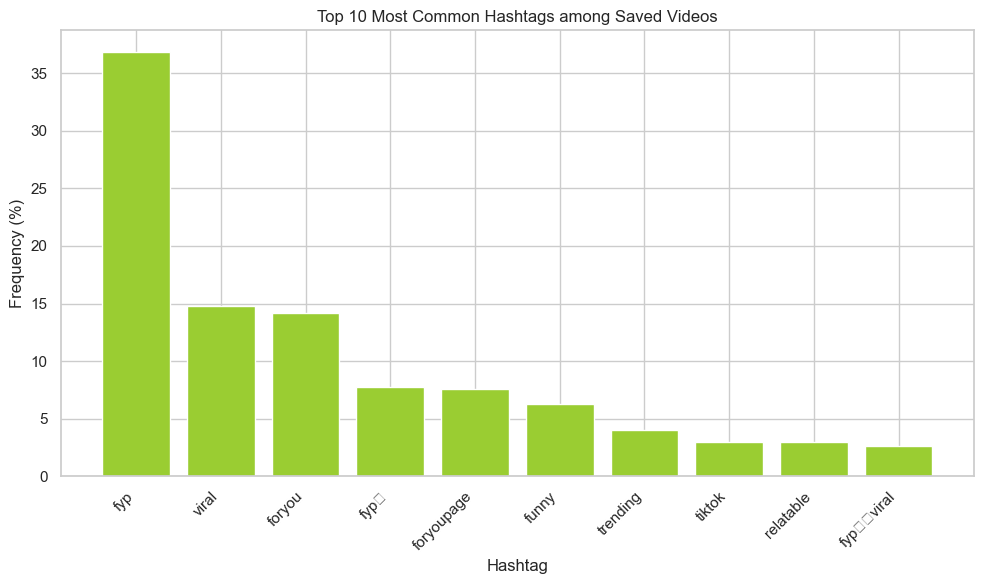

In [321]:
# for test only
color_map_hashtag = {
    'fyp': 'skyblue',
    'viral': 'salmon',
    'foryou': 'lightgreen',
    'fypシ': 'gold',
    'foryoupage': 'lightcoral',
    'funny': 'lightblue',
    'trending': 'orange',
    'tiktok': 'pink',
    'relatable': 'yellowgreen',
    'fypシ゚viral': 'lavender'
}

labels = [urllib.parse.unquote(item[0]) for item in most_common_hashtags_saved]

# truncate label if necessary
max_label_length = 15  
truncated_labels = [hashtag[:max_label_length] + '...' if len(hashtag) > max_label_length else hashtag for hashtag, _ in most_common_hashtags_saved]
counts = [item[1] for item in most_common_hashtags_saved]

# calculate the total number of occurrences and percentages
total_occurrences = sum(counts)
percentages = [(count / total_occurrences) * 100 for count in counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color='yellowgreen')
plt.xlabel('Hashtag')
plt.ylabel('Frequency (%)')
plt.title('Top 10 Most Common Hashtags among Saved Videos')   # change title name as necessary
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [279]:
# repeat for author

# extract authors from the "author" column + count frequency
authors_saved = df_saved_videos['author'].dropna()    # change df name as necessary
authors_saved_count = Counter(authors_saved)

authors_all = df_all['author'].str.split(', ').explode().dropna()    # change df name as necessary
authors_all_count = Counter(authors_all)

most_common_authors_saved = authors_saved_count.most_common(10)  
most_common_authors_all = authors_all_count.most_common(10)  

# print the most common authors
print("--- Most common Authors in df_saved_videos ---")
for author, count in most_common_authors_saved:
    print(f"{author}: {count} times")

print("\n--- Most common Authors in df_all ---")
for author, count in most_common_authors_all:
    print(f"{author}: {count} times")


--- Most common Authors in df_saved_videos ---
keemokazi: 47 times
infamous_wu13: 34 times
jackdoherty: 33 times
krissleos: 33 times
lala_sadii: 31 times
barstoolsports: 29 times
riristea: 27 times
diamantblazi: 26 times
realjayllnn: 26 times
grace.mitscherlich: 24 times

--- Most common Authors in df_all ---
keemokazi: 180 times
lala_sadii: 151 times
krissleos: 127 times
grace.mitscherlich: 123 times
jackdoherty: 122 times
diamantblazi: 115 times
infamous_wu13: 110 times
riristea: 92 times
barstoolsports: 89 times
skyyjade: 84 times


In [314]:
combined_authors = [author for author, _ in most_common_authors_saved] + [author for author, _ in most_common_authors_all]

unique_authors = list(set(combined_authors))

print(unique_authors) 

['realjayllnn', 'infamous_wu13', 'keemokazi', 'jackdoherty', 'riristea', 'grace.mitscherlich', 'lala_sadii', 'barstoolsports', 'skyyjade', 'krissleos', 'diamantblazi']


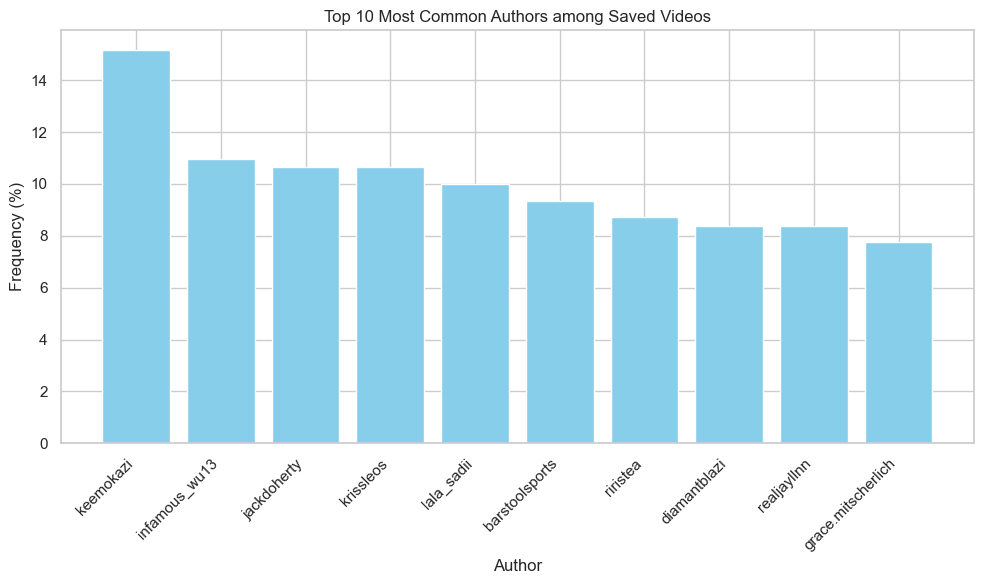

In [319]:
saved_authors = set([author for author, _ in most_common_authors_saved])
other_authors = set([author for author, _ in most_common_authors_all]) - saved_authors

# map colors
saved_color = 'skyblue'
other_color = 'lightgrey'
color_map = {author: saved_color for author in saved_authors}
color_map.update({author: other_color for author in other_authors})

labels = [item[0] for item in most_common_authors_saved]
# truncate label if necessary
max_label_length = 15  
truncated_labels = [author[:max_label_length] + '...' if len(author) > max_label_length else author for author, _ in most_common_authors_saved]
counts = [item[1] for item in most_common_authors_saved]

# calculate the total number of occurrences and percentages
total_occurrences = sum(counts)
percentages = [(count / total_occurrences) * 100 for count in counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentages, color=[color_map[label] for label in labels])
plt.xlabel('Author')
plt.ylabel('Frequency (%)')
plt.title('Top 10 Most Common Authors among Saved Videos')   # change title name as necessary
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

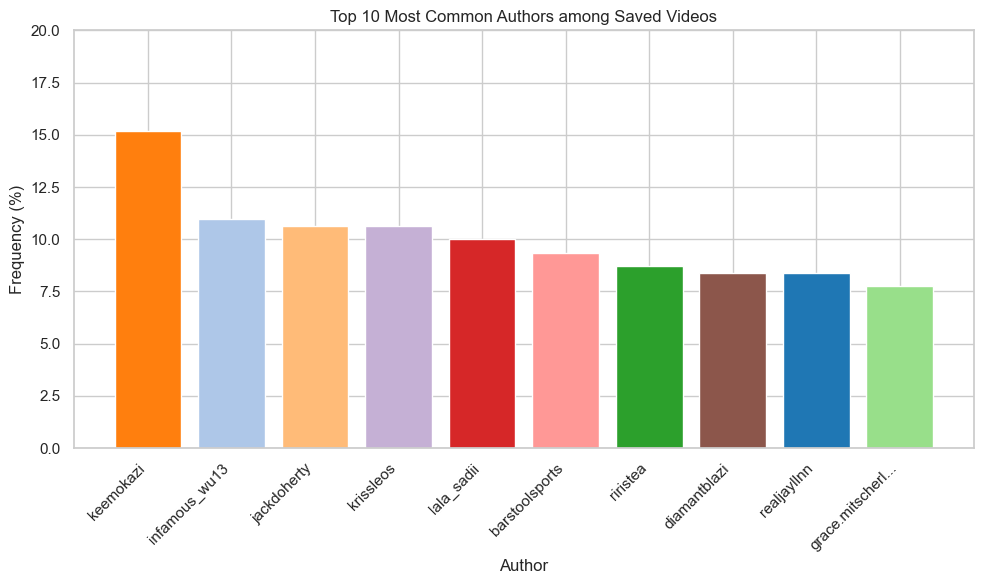

In [297]:
tab10_colors = plt.cm.tab20(range(len(unique_authors)))
color_map_author_tab10 = dict(zip(unique_authors, tab10_colors))

labels = [item[0] for item in most_common_authors_saved]
# Truncate label if necessary
max_label_length = 15  
truncated_labels = [author[:max_label_length] + '...' if len(author) > max_label_length else author for author, _ in most_common_authors_saved]
counts = [item[1] for item in most_common_authors_saved]

# Calculate the total number of occurrences and percentages
total_occurrences = sum(counts)
percentages = [(count / total_occurrences) * 100 for count in counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(truncated_labels, percentages, color=[color_map_author_tab10[label] for label in labels])  # Use truncated_labels here
plt.xlabel('Author')
plt.ylabel('Frequency (%)')
plt.title('Top 10 Most Common Authors among Saved Videos')   # Change title name as necessary
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 20)
plt.tight_layout()
plt.show()


In [298]:
## repeat for sounds

# extract music from the "music" column + count frequency
music_saved = df_saved_videos['music'].dropna()    # change df name as necessary
music_saved_count = Counter(music_saved)

music_all = df_all['music'].str.split(', ').explode().dropna()    # change df name as necessary
music_all_count = Counter(music_all)

most_common_music_saved = music_saved_count.most_common(10)  
most_common_music_all = music_all_count.most_common(10)  

# print the most common authors
print("--- Most common Sounds in df_saved_videos ---")
for author, count in most_common_music_saved:
    print(f"{author}: {count} times")

print("\n--- Most common Sounds in df_all ---")
for author, count in most_common_music_all:
    print(f"{author}: {count} times")


--- Most common Authors in df_saved_videos ---
Love You So - The King Khan & BBQ Show: 51 times
Monkeys Spinning Monkeys - Kevin MacLeod & Kevin The Monkey: 48 times
original sound - KEEMOKAZI: 46 times
original sound - The Relationship Hub: 41 times
orijinal ses - caner: 37 times
original sound - Jack Doherty: 33 times
original sound - Kriss&Esme: 32 times
Hard News - DM Production: 27 times
original sound - JAYLLNN: 26 times
Following just the New tiktoker - TikTok Queen🇧🇪 🇮🇹: 20 times

--- Most common Authors in df_all ---
Monkeys Spinning Monkeys - Kevin MacLeod & Kevin The Monkey: 197 times
original sound - KEEMOKAZI: 177 times
Love You So - The King Khan & BBQ Show: 153 times
orijinal ses - caner: 153 times
original sound - The Relationship Hub: 132 times
original sound - Jack Doherty: 122 times
original sound - Kriss&Esme: 115 times
AIN'T GONNA ANSWER - NLE Choppa & Lil Wayne: 113 times
Suspense: 97 times
Hard News - DM Production: 92 times


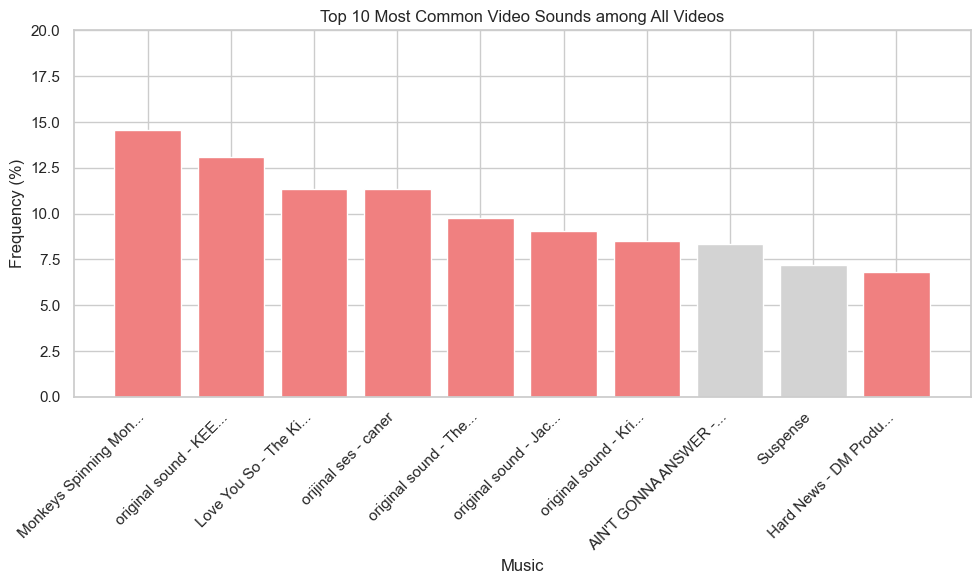

In [311]:
saved_music = set([author for author, _ in most_common_music_saved])
other_music = set([author for author, _ in most_common_music_all]) - saved_music

# map colors
saved_color = 'lightcoral'
other_color = 'lightgrey'

# Create a dictionary to map music to colors
color_map = {author: saved_color for author in saved_music}
color_map.update({author: other_color for author in other_music})

# Extract labels and counts
labels = [item[0] for item in most_common_music_all]
counts = [item[1] for item in most_common_music_all]

# Calculate percentages
total_occurrences = sum(counts)
percentages = [(count / total_occurrences) * 100 for count in counts]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(truncated_labels, percentages, color=[color_map[label] for label in labels])  # Use truncated_labels here
plt.xlabel('Music')
plt.ylabel('Frequency (%)')
plt.title('Top 10 Most Common Video Sounds among All Videos')   # Change title name as necessary
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 20)
plt.tight_layout()
plt.show()


### Old Code (Do not run!)

In [ ]:
## Helper functions

# for splitting hashtags  
#splitter = lambda x: np.nan if pd.isna(x) else [s.strip() for s in str(x).split(',')]

In [25]:
# Group by batch index (did not include in paper)
#grouped = df_all.groupby(["collectionTime", "testType"])

# Calculate summary statistics
summary_stats = df_all.agg({
    "likes": ["mean", "median", "std", "min", "max"],
    "comments": ["mean", "median", "std", "min", "max"],
    "shares": ["mean", "median", "std", "min", "max"],
    "saves": ["mean", "median", "std", "min", "max"]
})

print("Summary Statistics for Numerical Variables:")
print(summary_stats)

Summary Statistics for Numerical Variables:
               likes       comments        shares         saves
mean    6.210345e+05    6844.914120  5.454501e+04  1.498964e+04
median  1.588000e+05    1351.000000  1.380000e+04  1.329000e+03
std     1.431519e+06   19973.567861  1.294201e+05  4.950547e+04
min     0.000000e+00       0.000000  0.000000e+00  0.000000e+00
max     2.630000e+07  494600.000000  2.800000e+06  1.700000e+06


In [ ]:
# repeat analysis to find difference between saved videos and feed
saved_diff_list = []
collection_times = df_all['collectionTime'].unique()

variables = ['hashtag', 'author', 'music']

for coll_time in collection_times:
    jaccard_dict = {}
    for variable in variables:
        sub_df_saved = df_saved_videos[df_saved_videos['collectionTime'] == coll_time]
        sub_df_exp = df_save[df_save['collectionTime'] == coll_time]

        saved_list = sub_df_saved[variable].dropna().tolist()
        save_list = sub_df_saves[variable].dropna().tolist()

        # do not include fyp
        if variable == 'hashtag':
            saved_list = [x for x in saved_list if x != 'fyp']
            save_list = [x for x in save_list if x != 'fyp']

        pair_value = sub_df_saved['pair'].iloc[0]

        diff_val = (1 - jaccard_index(saved_list, save_list)) * 100
        jaccard_dict['collectionTime'] = coll_time
        jaccard_dict['pair'] = pair_value
        jaccard_dict[variable] = diff_val
    
    saved_diff_list.append(jaccard_dict)
    

df_saved_diff = pd.DataFrame(saved_diff_list)
#df_diff.set_index('collectionTime', inplace=True)
df_saved_diff = df_saved_diff.sort_values(by=['pair', 'collectionTime'])
df_saved_diff

In [ ]:
# repeat analysis to find difference between saved videos and feed
saved_diff_list = []
collection_times = df_all['collectionTime'].unique()

variables = ['hashtag', 'author', 'music']

for coll_time in collection_times:
    jaccard_dict = {}
    for variable in variables:
        sub_df_saved = df_saved_videos[df_saved_videos['collectionTime'] == coll_time]
        sub_df_exp = df_save[df_save['collectionTime'] == coll_time]

        saved_list = sub_df_saved[variable].dropna().tolist()
        save_list = sub_df_saves[variable].dropna().tolist()

        # do not include fyp
        if variable == 'hashtag':
            saved_list = [x for x in saved_list if x != 'fyp']
            save_list = [x for x in save_list if x != 'fyp']

        pair_value = sub_df_saved['pair'].iloc[0]

        diff_val = (1 - jaccard_index(saved_list, save_list)) * 100
        jaccard_dict['collectionTime'] = coll_time
        jaccard_dict['pair'] = pair_value
        jaccard_dict[variable] = diff_val
    
    saved_diff_list.append(jaccard_dict)
    

df_saved_diff = pd.DataFrame(saved_diff_list)
#df_diff.set_index('collectionTime', inplace=True)
df_saved_diff = df_saved_diff.sort_values(by=['pair', 'collectionTime'])
df_saved_diff

In [ ]:
## DO NOT RUN

combined_sounds = [sound for sound, _ in most_common_music_saved] + [music for music, _ in most_common_music_all]

unique_sounds = list(set(combined_sounds))

print(unique_sounds) 
# Create a color map dictionary
colors = plt.cm.tab20(range(len(sound for sound, _ in most_common_music_saved)))
color_map = dict(zip(unique_sounds, colors))


labels = [item[0] for item in most_common_music_all]
# Truncate label if necessary
max_label_length = 20  
truncated_labels = [author[:max_label_length] + '...' if len(author) > max_label_length else author for author, _ in most_common_music_all]
counts = [item[1] for item in most_common_music_all]

# Calculate the total number of occurrences and percentages
total_occurrences = sum(counts)
percentages = [(count / total_occurrences) * 100 for count in counts]

plt.figure(figsize=(10, 6))
bars = plt.bar(truncated_labels, percentages, color=[color_map[label] for label in labels])  # Use truncated_labels here
plt.xlabel('Author')
plt.ylabel('Frequency (%)')
plt.title('Top 10 Most Common Video Authors among All Videos')   # Change title name as necessary
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 20)
plt.tight_layout()
plt.show()
